In [33]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import copy 

import download
import observatories
import analysis
import events
import data
import correlation
import reference
import const

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
january = analysis.loadData(2022,1)

[[['III', 01:27:56, 01:28:14, '0.6035'], ['III', 03:01:20, 03:01:39, '0.6006'], ['III', 03:25:42, 03:26:09, '0.6479'], ['III', 03:28:06, 03:28:23, '0.6108'], ['III', 04:45:48, 04:46:15, '0.6438'], ['III', 07:26:42, 07:27:17, '0.6358'], ['III', 12:35:26, 12:35:55, '0.6646'], ['III', 12:56:27, 12:57:09, '0.6493'], ['III', 13:43:19, 13:43:27, '0.9865'], ['III', 13:44:47, 13:44:53, '0.6379'], ['III', 14:53:22, 14:53:29, '0.6281'], ['III', 14:59:22, 14:59:45, '0.8561'], ['III', 15:13:37, 15:13:48, '0.7044'], ['III', 15:15:54, 15:16:14, '0.6122'], ['III', 15:21:08, 15:21:17, '0.6612'], ['III', 16:00:49, 16:01:02, '0.6118'], ['III', 17:39:53, 17:40:10, '0.6343'], ['III', 19:18:46, 19:19:04, '0.6064'], ['III', 19:35:51, 19:36:11, '0.6325'], ['III', 21:54:10, 21:54:32, '0.6685'], ['III', 21:58:09, 21:58:41, '0.6569'], ['III', 22:24:36, 22:25:24, '0.6724'], ['III', 22:33:13, 22:33:28, '0.8558'], ['III', 22:58:06, 22:58:22, '0.6191']], [['III', 06:32:38, 06:32:56, '0.6184'], ['III', 07:00:45, 07:

In [16]:
days_checked = []
for i, day in enumerate(january):
    print(i + 1)
    e_list = events.EventList([])
    for peak in day:
        print("new peak: ", peak)
        obs = observatories.ObservatorySet(peak.stations)
        for o in obs.getSet():
            dp1, dp2, cor = analysis.calcPoint(2022, 1, peak.time_start.day, peak.time_start, o[0], o[1], mask_frq=True)
            e_list += cor.peaks
    days_checked.append(e_list)

1
new peak:  ['III', 01:27:56, 01:28:14, '0.6035']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 03:01:20, 03:01:39, '0.6006']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 03:25:42, 03:26:09, '0.6479']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[['III', 03:25:37, 03:25:52, '0.8083']]
new peak:  ['III', 03:28:06, 03:28:23, '0.6108']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[['III', 03:25:37, 03:25:52, '0.8083']]
new peak:  ['III', 04:45:48, 04:46:15, '0.6438']
2022_1_1_INDONESIA_Australia-ASSA_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 07:26:42, 07:27:17, '0.6358']
2022_1_1_Australia-ASSA_HUMAIN_45_nobg_bintime_4_flatten_2000.png
[]
new peak:  ['III', 12:35:26, 12:35:55, '0.6646']
2022_1_1_AUSTRIA-UNIGRAZ_HUMAIN_45_nobg_bintime_4_flatten_2000.png
[['III', 12:35:27, 12:35:58, '0.8107']]
new peak:  ['III', 12:56:27, 12:57:09, '0.649

TypeError: buffer is too small for requested array

In [54]:
op = data.createFromTime(peak.time_start.year, peak.time_start.month, peak.time_start.day, 
                         peak.time_start.__str__(), peak.stations[0], const.spectral_range)
oo = data.createFromTime(peak.time_start.year, peak.time_start.month, peak.time_start.day, 
                         peak.time_start.__str__(), peak.stations[1], const.spectral_range)

op.plot()
oo.plot() 

AttributeError: 'NoneType' object has no attribute 'data'

In [35]:
dp1 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[0], const.spectral_range)
dp2 = data.createDay(peak.time_start.year, peak.time_start.month, peak.time_start.day, peak.stations[1], const.spectral_range)
dp1, dp2 = data.fitTimeFrameDataSample(dp1, dp2)
cor = correlation.Correlation(dp1, dp2, peak.time_start.day)

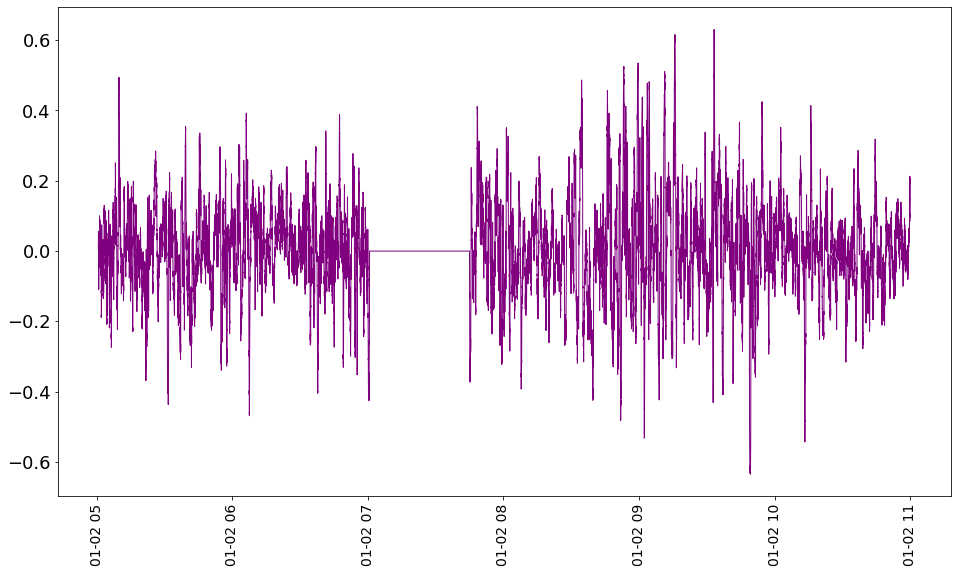

In [36]:
cor.calculatePeaks()
fig, ax = plt.subplots(figsize=(16,9))
cor.plotCurve(ax)
plt.show()

In [43]:
import os
f = os.listdir(const.pathDataDay(2022,1,2))
g = [i for i in f if i.startswith(peak.stations[1].name)]

In [46]:
for i in g:
    print(i)
    j = data.DataPoint(const.pathDataDay(2022,1,2) + i)

INDONESIA_20220102_000000_59.fit.gz
INDONESIA_20220102_001500_59.fit.gz
INDONESIA_20220102_003000_59.fit.gz
INDONESIA_20220102_004500_59.fit.gz
INDONESIA_20220102_010000_59.fit.gz
INDONESIA_20220102_011500_59.fit.gz
INDONESIA_20220102_013000_59.fit.gz
INDONESIA_20220102_014500_59.fit.gz
INDONESIA_20220102_020000_59.fit.gz
INDONESIA_20220102_021500_59.fit.gz
INDONESIA_20220102_023000_59.fit.gz
INDONESIA_20220102_024500_59.fit.gz
INDONESIA_20220102_030000_59.fit.gz
INDONESIA_20220102_031500_59.fit.gz
INDONESIA_20220102_033000_59.fit.gz
INDONESIA_20220102_034500_59.fit.gz
INDONESIA_20220102_040000_59.fit.gz
INDONESIA_20220102_041500_59.fit.gz
INDONESIA_20220102_043000_59.fit.gz
INDONESIA_20220102_044500_59.fit.gz
INDONESIA_20220102_045959_59.fit.gz
INDONESIA_20220102_051500_59.fit.gz
INDONESIA_20220102_053000_59.fit.gz
INDONESIA_20220102_054459_59.fit.gz
INDONESIA_20220102_060000_59.fit.gz
INDONESIA_20220102_061500_59.fit.gz
INDONESIA_20220102_063000_59.fit.gz
INDONESIA_20220102_064500_59

TypeError: buffer is too small for requested array

In [49]:
from astropy.io import fits
a = fits.open(const.pathDataDay(2022,1,2) + i)

In [52]:
a[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3600 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '2022-01-02'         / Time of observation                            
CONTENT = '2022/01/02  Radio flux density, e-CALLISTO (INDONESIA)' / Title of im
ORIGIN  = 'Sumedang'        

In [53]:
a[0].data

TypeError: buffer is too small for requested array